In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return np.exp(x) / (np.exp(x) + 1)

In [3]:
class Logistic:
    
    def __init__(self, rate=0.01, cycles=10000):
        self.rate = rate
        self.cycles = cycles
    
    def run(self, points, ids):
        self.theta = np.zeros(np.size(points[0]))
        self.bias = 0
        
        self.best_theta = np.zeros(np.size(points[0]))
        self.best_bias = 0
        self.best_miss_count = len(ids)
        self.best_best_miss = []
        
        self.loss = np.zeros(self.cycles)
        
        for i in range(self.cycles):
            for point, truth in zip(points, ids):
                error = truth - self.predict(point)
                self.compute_loss(i, point, truth)
                
                shift = abs(error) * self.rate
                dot = np.dot(point, self.theta) + self.bias
                self.bias -= shift * (sigmoid(dot) - truth)
                self.theta -= shift * point * (sigmoid(dot) - truth)
            self.compute_miss(points, ids)
        
        self.report(points, ids)
        return self
    
    def compute_loss(self, i, x, y):
        dot = np.dot(x, self.theta)
        self.loss[i] -= y * np.log(sigmoid(dot)) + (1 - y) * np.log(sigmoid(-1 * dot))
    
    def predict(self, ds):
        return np.where(sigmoid(np.dot(ds, self.theta) + self.bias) > 0.5, 1, 0)
    
    def compute_miss(self, points, ids):
        miss_count = 0
        miss = []
        for point, truth in zip(points, ids):
            prediction = self.predict(point)
            if truth - prediction != 0:
                miss_count += 1
                miss.append(point)
        if miss_count <= self.best_miss_count:
            self.best_miss_count = miss_count
            self.best_miss = miss
            self.best_bias = self.bias
            self.best_theta = self.theta
    
    def report(self, points, ids):
        miss = []
        for point, truth in zip(points, ids):
            prediction = self.predict(point)
            if truth - prediction != 0:
                miss.append([point, prediction, truth])
        if len(miss) > 0:
            print("Mislabeled:")
            for c in miss:
                print("{0}, prediction: {1}, truth: {2}".format(c[0], c[1], c[2]))

In [4]:
log = Logistic()

In [5]:
data = np.load('Data4/data.npz')
x = data['x']
y = data['y']

In [6]:
out = log.run(x,y)

In [7]:
print(out.theta)
print(out.bias)
print(out.best_theta)
print(out.best_bias)
print(out.best_miss)

[0.01526147 0.00013648 0.02717298]
-0.035015352464194745
[0.01526147 0.00013648 0.02717298]
-0.035015352464194745
[]


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

Text(0, 0.5, 'Loss')

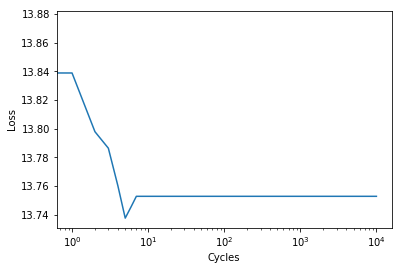

In [9]:
plt.plot(out.loss)
plt.xscale('log')
plt.xlabel('Cycles')
plt.ylabel('Loss')

In [10]:
if len(x[0]) == 2:
    plot_decision_regions(x, y, clf=log)